# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os
from sklearn.neighbors import KNeighborsClassifier
      

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Loading Data

In [3]:
data  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/preprocessed_data.csv',encoding='utf7')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 10 columns):
school_state                                    109248 non-null object
teacher_prefix                                  109248 non-null object
project_grade_category                          109248 non-null object
teacher_number_of_previously_posted_projects    109248 non-null int64
project_is_approved                             109248 non-null int64
clean_categories                                109248 non-null object
clean_subcategories                             109248 non-null object
essay                                           109248 non-null object
price                                           109248 non-null float64
project_title                                   109248 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 8.3+ MB


In [0]:
feature_Bow = list()
feature_Tf_idf = list()

In [5]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home


## 1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [0]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

## 1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h3>project_title - Bag of Words<h3>

In [7]:
vectorizer = CountVectorizer(min_df=10,binary=True)
vectorizer.fit(X_train['project_title'].values)

project_title_bag_of_words_X_train = vectorizer.transform(X_train['project_title'].values)
project_title_bag_of_words_X_cv = vectorizer.transform(X_cv['project_title'].values)
project_title_bag_of_words_X_test = vectorizer.transform(X_test['project_title'].values)

feature_Bow = feature_Bow + vectorizer.get_feature_names()

print("="*50)
print("Bag of Words")
print("Shape of matrix after vectorizations (project_title)")
print("="*50)
print("X_train  :",project_title_bag_of_words_X_train.shape)
print("X_cv     :",project_title_bag_of_words_X_cv.shape)
print("X_test   :",project_title_bag_of_words_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)


Bag of Words
Shape of matrix after vectorizations (project_title)
X_train  : (49041, 2095)
X_cv     : (24155, 2095)
X_test   : (36052, 2095)
['04', '05', '10', '100', '101', '123', '16', '1st', '2016', '2017', '21st', '2nd', '3d', '3doodler', '3doodlers', '3rd', '4th', '5th', '60', '6th', '7th', '8th', 'abc', 'abcs', 'abilities', 'aboard', 'about', 'above', 'academic', 'academics', 'academy', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'achieving', 'across', 'act', 'action', 'active', 'actively', 'activities', 'activity', 'adaptive', 'add', 'adding', 'additional', 'adds', 'adhd', 'advanced', 'adventure', 'adventures', 'african', 'after', 'again', 'age', 'ahead', 'aid', 'air', 'alexa', 'algebra', 'alive', 'all', 'allow', 'allows', 'along', 'aloud', 'alouds', 'alphabet', 'alternative', 'always', 'am', 'amazing', 'amazon', 'america', 'american', 'an', 'analysis', 'anchor', 'ancient', 'and', 'animal', 'animals', 'animation', 'another', 'answers', 'ants', '

<h3>Project_title Tf-idf

In [8]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values)

project_title_tfidf_X_train = vectorizer.transform(X_train['project_title'].values)
project_title_tfidf_X_cv = vectorizer.transform(X_cv['project_title'].values)
project_title_tfidf_X_test = vectorizer.transform(X_test['project_title'].values)

feature_Tf_idf = feature_Tf_idf + vectorizer.get_feature_names()

print("="*50)
print("Tfidf Vectorizer")
print("Shape of matrix after vectorizations (project_title)")
print("="*50)
print("X_train  :",project_title_tfidf_X_train.shape)
print("X_cv     :",project_title_tfidf_X_cv.shape)
print("X_test   :",project_title_tfidf_X_test.shape)
print("="*50)
#print(vectorizer.get_feature_names())
#print("="*50)

Tfidf Vectorizer
Shape of matrix after vectorizations (project_title)
X_train  : (49041, 2095)
X_cv     : (24155, 2095)
X_test   : (36052, 2095)


<h3>Essay - Bag of Words<h3>

In [9]:
vectorizer = CountVectorizer(min_df=10,binary=True)
vectorizer.fit(X_train['essay'].values)

essay_bag_of_words_X_train = vectorizer.transform(X_train['essay'].values)
essay_bag_of_words_X_cv = vectorizer.transform(X_cv['essay'].values)
essay_bag_of_words_X_test = vectorizer.transform(X_test['essay'].values)

feature_Bow = feature_Bow + vectorizer.get_feature_names()

print("="*50)
print("Bag of Words")
print("Shape of matrix after vectorizations (essay)")
print("="*50)
print("X_train  :",essay_bag_of_words_X_train.shape)
print("X_cv     :",essay_bag_of_words_X_cv.shape)
print("X_test   :",essay_bag_of_words_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Bag of Words
Shape of matrix after vectorizations (essay)
X_train  : (49041, 12157)
X_cv     : (24155, 12157)
X_test   : (36052, 12157)
['00', '000', '00pm', '10', '100', '1000', '100th', '101', '102', '103', '105', '10th', '11', '110', '1100', '115', '11th', '12', '120', '1200', '125', '12th', '13', '130', '1300', '135', '13th', '14', '140', '1400', '14th', '15', '150', '1500', '16', '160', '1600', '17', '170', '1700', '175', '17th', '18', '180', '1800', '19', '1950', '1960s', '1970', '1980', '1993', '19th', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '2029', '20th', '21', '21st', '22', '220', '23', '24', '240', '25', '250', '26', '27', '270', '28', '280', '29', '2d', '2nd', '30', '300', '3000', '31', '32', '320', '33', '34', '340', '35', '350', '36', '360', '365', '37', '375', '38', '380', '39', '3d', '3doodler', '3doodlers', '3rd', '40', '400', '41', '42', 

<h3>Essay - Tf-idf<h3>

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)

essay_tfidf_X_train = vectorizer.transform(X_train['essay'].values)
essay_tfidf_X_cv = vectorizer.transform(X_cv['essay'].values)
essay_tfidf_X_test = vectorizer.transform(X_test['essay'].values)

feature_Tf_idf = feature_Tf_idf + vectorizer.get_feature_names()

print("="*50)
print("Tfidf Vectorizer")
print("Shape of matrix after vectorizations (essay)")
print("="*50)
print("X_train  :",essay_tfidf_X_train.shape)
print("X_cv     :",essay_tfidf_X_cv.shape)
print("X_test   :",essay_tfidf_X_test.shape)
print("="*50)
#print(vectorizer.get_feature_names())
#print("="*50)

Tfidf Vectorizer
Shape of matrix after vectorizations (essay)
X_train  : (49041, 12157)
X_cv     : (24155, 12157)
X_test   : (36052, 12157)


## 1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>school_state<h3>

In [11]:
# we use count vectorizer to convert the values into one hot encoded features

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values)

states_one_hot_X_train = vectorizer.transform(X_train['school_state'].values)
states_one_hot_X_cv = vectorizer.transform(X_cv['school_state'].values)
states_one_hot_X_test = vectorizer.transform(X_test['school_state'].values)

feature_Bow = feature_Bow + vectorizer.get_feature_names()
feature_Tf_idf = feature_Tf_idf + vectorizer.get_feature_names()

print("="*50)
print("Shape of matrix after one hot encoding(school_state) ")
print("="*50)
print("X_train  :",states_one_hot_X_train.shape)
print("X_cv     :",states_one_hot_X_cv.shape)
print("X_test   :",states_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)


Shape of matrix after one hot encoding(school_state) 
X_train  : (49041, 51)
X_cv     : (24155, 51)
X_test   : (36052, 51)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>teacher_prefix<h3>

In [12]:
# we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values)

teacher_prefix_one_hot_X_train = vectorizer.transform(X_train['teacher_prefix'].values)
teacher_prefix_one_hot_X_cv = vectorizer.transform(X_cv['teacher_prefix'].values)
teacher_prefix_one_hot_X_test = vectorizer.transform(X_test['teacher_prefix'].values)

feature_Bow = feature_Bow + vectorizer.get_feature_names()
feature_Tf_idf = feature_Tf_idf + vectorizer.get_feature_names()

print("="*50)
print("Shape of matrix after one hot encoding(teacher_prefix) ")
print("="*50)
print("X_train  :",teacher_prefix_one_hot_X_train.shape)
print("X_cv     :",teacher_prefix_one_hot_X_cv.shape)
print("X_test   :",teacher_prefix_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Shape of matrix after one hot encoding(teacher_prefix) 
X_train  : (49041, 5)
X_cv     : (24155, 5)
X_test   : (36052, 5)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>project_grade_category	<h3>

In [13]:
# we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values)

project_grade_one_hot_X_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_one_hot_X_cv = vectorizer.transform(X_cv['project_grade_category'].values)
project_grade_one_hot_X_test = vectorizer.transform(X_test['project_grade_category'].values)

feature_Bow = feature_Bow + vectorizer.get_feature_names()
feature_Tf_idf = feature_Tf_idf + vectorizer.get_feature_names()

print("="*50)
print("Shape of matrix after one hot encoding(project_grade_category) ")
print("="*50)
print("X_train  :",project_grade_one_hot_X_train.shape)
print("X_cv     :",project_grade_one_hot_X_cv.shape)
print("X_test   :",project_grade_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Shape of matrix after one hot encoding(project_grade_category) 
X_train  : (49041, 4)
X_cv     : (24155, 4)
X_test   : (36052, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h3>clean_categories<h3>

In [14]:
# we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_categories'].values)

clean_categories_one_hot_X_train = vectorizer.transform(X_train['clean_categories'].values)
clean_categories_one_hot_X_cv = vectorizer.transform(X_cv['clean_categories'].values)
clean_categories_one_hot_X_test = vectorizer.transform(X_test['clean_categories'].values)

feature_Bow = feature_Bow + vectorizer.get_feature_names()
feature_Tf_idf = feature_Tf_idf + vectorizer.get_feature_names()

print("="*50)
print("Shape of matrix after one hot encoding(clean_categories) ")
print("="*50)
print("X_train  :",clean_categories_one_hot_X_train.shape)
print("X_cv     :",clean_categories_one_hot_X_cv.shape)
print("X_test   :",clean_categories_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Shape of matrix after one hot encoding(clean_categories) 
X_train  : (49041, 9)
X_cv     : (24155, 9)
X_test   : (36052, 9)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>clean_subcategories<h3>

In [15]:
# we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

clean_subcategories_one_hot_X_train = vectorizer.transform(X_train['clean_subcategories'].values)
clean_subcategories_one_hot_X_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
clean_subcategories_one_hot_X_test = vectorizer.transform(X_test['clean_subcategories'].values)

feature_Bow = feature_Bow + vectorizer.get_feature_names()
feature_Tf_idf = feature_Tf_idf + vectorizer.get_feature_names()

print("="*50)
print("Shape of matrix after one hot encoding(clean_categories) ")
print("="*50)
print("X_train  :",clean_subcategories_one_hot_X_train.shape)
print("X_cv     :",clean_subcategories_one_hot_X_cv.shape)
print("X_test   :",clean_subcategories_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Shape of matrix after one hot encoding(clean_categories) 
X_train  : (49041, 30)
X_cv     : (24155, 30)
X_test   : (36052, 30)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3>teacher_number_of_previously_posted_projects<h3>


In [16]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

previously_posted_X_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
previously_posted_X_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
previously_posted_X_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))



previously_posted_X_train = previously_posted_X_train.reshape(-1,1)
previously_posted_X_cv = previously_posted_X_cv.reshape(-1,1)
previously_posted_X_test = previously_posted_X_test.reshape(-1,1)

feature_Bow = feature_Bow + ['teacher_number_of_previously_posted_projects']
feature_Tf_idf = feature_Tf_idf + ['teacher_number_of_previously_posted_projects']

print("="*50)
print("Shape of matrix after vectorizations(teacher_number_of_previously_posted_projects) ")
print("="*50)
print("X_train  :",previously_posted_X_train.shape)
print("X_cv     :",previously_posted_X_cv.shape)
print("X_test   :",previously_posted_X_test.shape)
print("="*50)


Shape of matrix after vectorizations(teacher_number_of_previously_posted_projects) 
X_train  : (49041, 1)
X_cv     : (24155, 1)
X_test   : (36052, 1)


<h3>price<h3>


In [17]:
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_X_train = normalizer.transform(X_train['price'].values.reshape(1,-1))
price_X_cv = normalizer.transform(X_cv['price'].values.reshape(1,-1))
price_X_test = normalizer.transform(X_test['price'].values.reshape(1,-1))

feature_Bow = feature_Bow + ['price']
feature_Tf_idf = feature_Tf_idf + ['price']

price_X_train = price_X_train.reshape(-1,1)
price_X_cv = price_X_cv.reshape(-1,1)
price_X_test = price_X_test.reshape(-1,1)

print("="*50)
print("Shape of matrix after vectorizations(price) ")
print("="*50)
print("X_train  :",price_X_train.shape)
print("X_cv     :",price_X_cv.shape)
print("X_test   :",price_X_test.shape)
print("="*50)

Shape of matrix after vectorizations(price) 
X_train  : (49041, 1)
X_cv     : (24155, 1)
X_test   : (36052, 1)


<h3><font color='red'> Combining all feature vecters into one Vecter</font>

In [0]:
from scipy.sparse import hstack
#Bag_of_words
X_train_Bow = hstack((states_one_hot_X_train,teacher_prefix_one_hot_X_train,project_grade_one_hot_X_train,clean_categories_one_hot_X_train,
clean_subcategories_one_hot_X_train,previously_posted_X_train,price_X_train,essay_bag_of_words_X_train,project_title_bag_of_words_X_train)).tocsr()

X_cv_Bow = hstack((states_one_hot_X_cv, teacher_prefix_one_hot_X_cv,project_grade_one_hot_X_cv,clean_categories_one_hot_X_cv,
clean_subcategories_one_hot_X_cv,previously_posted_X_cv,price_X_cv,essay_bag_of_words_X_cv,project_title_bag_of_words_X_cv)).tocsr()

X_test_Bow = hstack((states_one_hot_X_test, teacher_prefix_one_hot_X_test,project_grade_one_hot_X_test,clean_categories_one_hot_X_test,
clean_subcategories_one_hot_X_test,previously_posted_X_test,price_X_test,essay_bag_of_words_X_test,project_title_bag_of_words_X_test)).tocsr()


In [0]:
#Tf-idf
X_train_tfidf = hstack((states_one_hot_X_train,teacher_prefix_one_hot_X_train,project_grade_one_hot_X_train,clean_categories_one_hot_X_train,
clean_subcategories_one_hot_X_train,previously_posted_X_train,price_X_train,essay_tfidf_X_train,project_title_tfidf_X_train)).tocsr()

X_cv_tfidf = hstack((states_one_hot_X_cv, teacher_prefix_one_hot_X_cv,project_grade_one_hot_X_cv,clean_categories_one_hot_X_cv,
clean_subcategories_one_hot_X_cv,previously_posted_X_cv,price_X_cv,essay_tfidf_X_cv,project_title_tfidf_X_cv)).tocsr()

X_test_tfidf = hstack((states_one_hot_X_test, teacher_prefix_one_hot_X_test,project_grade_one_hot_X_test,clean_categories_one_hot_X_test,
clean_subcategories_one_hot_X_test,previously_posted_X_test,price_X_test,essay_tfidf_X_test,project_title_tfidf_X_test)).tocsr()


## 1.5 Appling NB on different kind of featurization as mentioned in the instructions

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

BAG of Words 

100%|██████████| 9/9 [00:36<00:00,  3.90s/it]


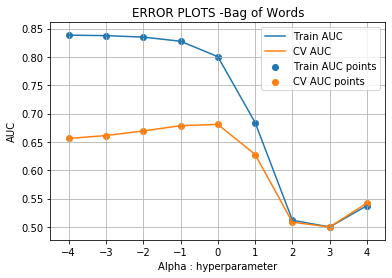

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import math

train_auc = []
cv_auc = []
y_train = y_train.reshape(y_train.size, 1)
alpha = [10**x for x in range(-4,5)]
alpha_log = [math.log(10**x,10) for x in range(-4,5)]

for i in tqdm(alpha):
    classifer = MultinomialNB(alpha = i,class_prior=[0.5,0.5])     
    classifer.fit(X_train_Bow.toarray(), y_train)

    y_train_pred = batch_predict(classifer, X_train_Bow)    
    y_cv_pred = batch_predict(classifer, X_cv_Bow)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')

plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log,cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS -Bag of Words")
plt.grid()
plt.show()

TF-idf

100%|██████████| 9/9 [00:33<00:00,  3.77s/it]


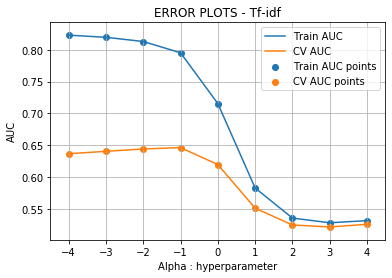

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB

train_auc = []
cv_auc = []
y_train = y_train.reshape(y_train.size, 1)
alpha = [10**x for x in range(-4,5)]
alpha_log = [math.log(10**x,10) for x in range(-4,5)]

for i in tqdm(alpha):
    classifer = MultinomialNB(alpha = i,class_prior=[0.5,0.5])     
    classifer.fit(X_train_tfidf.toarray(), y_train)

    y_train_pred = batch_predict(classifer, X_train_tfidf)    
    y_cv_pred = batch_predict(classifer, X_cv_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))



plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')

plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log,cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS - Tf-idf")
plt.grid()
plt.show()

In [0]:
# Here I'm selecting 40 as a best alpha  by seeing above plot
best_alpha = 1

Bag of Words with best Alpha

In [0]:
#https://datascience.stackexchange.com/questions/65219/find-the-top-n-features-from-feature-set-using-absolute-values-of-feature-log-p
def most_features(sorted_prob_class,features_lst):
  Most_imp_words = []

  for index in sorted_prob_class[-20:-1]:
    Most_imp_words.append(features_lst[index])

  return Most_imp_words

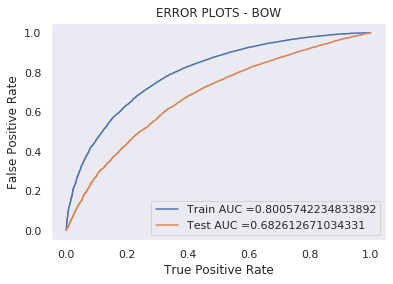

In [37]:
classifer = MultinomialNB(alpha = best_alpha,class_prior=[0.5,0.5])     
classifer.fit(X_train_Bow.toarray(), y_train)

y_train_pred = batch_predict(classifer, X_train_Bow)    
y_test_pred = batch_predict(classifer, X_test_Bow)

train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train, y_train_pred)
test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr_bow, train_tpr_bow, label="Train AUC ="+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label="Test AUC ="+str(auc(test_fpr_bow, test_tpr_bow)))
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ERROR PLOTS - BOW")
plt.grid()
plt.show()

In [38]:
sorted_prob_class = classifer.feature_log_prob_[0, :].argsort()

imp_features = most_features(sorted_prob_class[-20:-1],feature_Tf_idf)
print("="*100)
print("importent features for class 0 " ,imp_features)
print("="*100)

sorted_prob_class = classifer.feature_log_prob_[1, :].argsort()

imp_features = most_features(sorted_prob_class[-20:-1],feature_Tf_idf)
print("="*100)
print("importent features for class 1 " ,imp_features)
print("="*100)

importent features for class 0  ['aid', 'character', 'all', 'significance', 'soft', '92', 'hesitate', 'adventures', 'full', 'reinforced', 'diorama', 'refuge', 'fee', 'horseshoe', '200', 'feeders', 'he', 'ordered']
importent features for class 1  ['character', 'scripts', '92', 'soft', 'all', 'significance', 'hesitate', 'adventures', 'full', 'diorama', 'reinforced', 'fee', 'refuge', 'horseshoe', '200', 'feeders', 'he', 'ordered']


The maximum value of tpr*(1-fpr) 0.5274689281555345 for threshold 0.472
Train confusion matrix for BOW


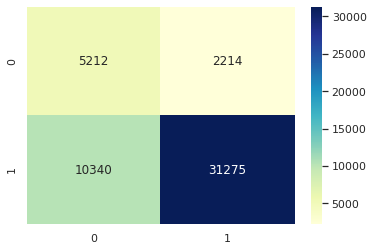

In [28]:
import seaborn as sns; sns.set()
best_t = find_best_threshold(tr_thresholds_bow, train_fpr_bow, train_tpr_bow)
print("="*50)
print("Train confusion matrix for BOW")
print("="*50)

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
uniform_data = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")


Test confusion matrix for BOW


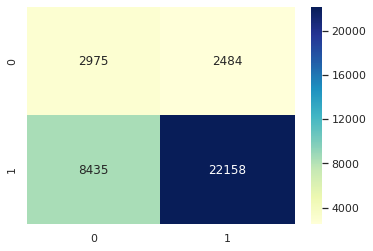

In [29]:
print("="*50)
print("Test confusion matrix for BOW")
print("="*50)

uniform_data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

TF-Idf with best Alpha

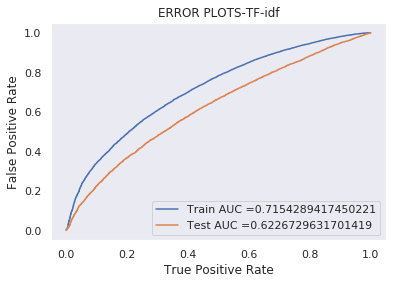

In [39]:
classifer = MultinomialNB(alpha = best_alpha,class_prior=[0.5,0.5])     
classifer.fit(X_train_tfidf.toarray(), y_train)

y_train_pred = batch_predict(classifer, X_train_tfidf)    
y_test_pred = batch_predict(classifer, X_test_tfidf)


train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ERROR PLOTS-TF-idf")
plt.grid()
plt.show()

In [40]:
sorted_prob_class = classifer.feature_log_prob_[0, :].argsort()

imp_features = most_features(sorted_prob_class[-20:-1],feature_Tf_idf)
print("="*100)
print("importent features for class 0 " ,imp_features)
print("="*100)

sorted_prob_class = classifer.feature_log_prob_[1, :].argsort()

imp_features = most_features(sorted_prob_class[-20:-1],feature_Tf_idf)
print("="*100)
print("importent features for class 1 " ,imp_features)
print("="*100)

importent features for class 0  ['allows', 'adventure', 'ahead', 'alouds', 'air', 'properly', 'algebra', '101', 'along', 'apples', 'age', 'answers', 'another', 'ants', 'again', 'african', 'allow', 'aid']
importent features for class 1  ['alouds', 'adventure', 'animals', 'ahead', 'air', 'apples', 'along', 'properly', 'algebra', '101', 'age', 'answers', 'ants', 'another', 'again', 'african', 'allow', 'aid']


The maximum value of tpr*(1-fpr) 0.4279507343212775 for threshold 0.589
Train confusion matrix for TF-idf


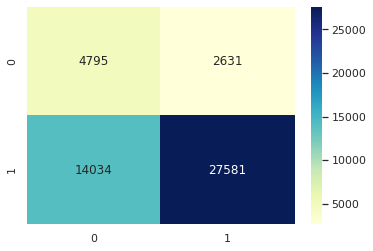

In [32]:
best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("="*50)
print("Train confusion matrix for TF-idf")
print("="*50)
uniform_data = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

Test confusion matrix for TF-idf


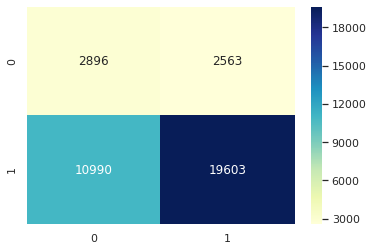

In [33]:
print("="*50)
print("Test confusion matrix for TF-idf")
print("="*50)


uniform_data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [34]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "HyperParameter", "AUC_Train","AUC_Test"]
x.add_row(["BOW", "MultinomialNB", best_alpha, str(auc(train_fpr_bow, train_tpr_bow)),str(auc(test_fpr_bow, test_tpr_bow))])
x.add_row(["TF-idf", "MultinomialNB", best_alpha,  str(auc(train_fpr_tfidf, train_tpr_tfidf)),str(auc(test_fpr_tfidf, test_tpr_tfidf))])

print(x)

+------------+---------------+----------------+--------------------+--------------------+
| Vectorizer |     Model     | HyperParameter |     AUC_Train      |      AUC_Test      |
+------------+---------------+----------------+--------------------+--------------------+
|    BOW     | MultinomialNB |       1        | 0.8005742234833892 | 0.682612671034331  |
|   TF-idf   | MultinomialNB |       1        | 0.7154289417450221 | 0.6226729631701419 |
+------------+---------------+----------------+--------------------+--------------------+
